In [1]:
import pandas as pd
import numpy as np

In [2]:
from pycaret.classification import *

Dataset from Kaggle:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset


In [10]:
heart_disease_df = pd.read_csv(r'C:/HeartDiseaseData/cardio_train.csv', sep =';')

In [11]:
heart_disease_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
heart_disease_df = heart_disease_df.drop(['id'], axis=1)


Data description </br>

There are 3 types of input features:</br>

Objective: factual information;</br></br>

Examination: results of medical examination;</br></br>

Subjective: information given by the patient.</br></br>

</br></br>
Features:

Age | Objective Feature | age | int (days) </br></br>

Height | Objective Feature | height | int (cm) |</br></br>

Weight | Objective Feature | weight | float (kg) |</br></br>

Gender | Objective Feature | gender | categorical code |</br></br>

Systolic blood pressure | Examination Feature | ap_hi | int |</br></br>

Diastolic blood pressure | Examination Feature | ap_lo | int |</br></br>

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |</br></br>

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |</br></br>

Smoking | Subjective Feature | smoke | binary | 1 or 0 </br></br>

Alcohol intake | Subjective Feature | alco | binary | 1 or 0 </br></br>

Physical activity | Subjective Feature | active | binary | 1 or 0 </br></br>

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |1 or 0</br></br>

</br></br>
All of the dataset values were collected at the moment of medical examination</br></br>

In [6]:
hd_data = heart_disease_df.sample(frac=0.7, random_state=786).reset_index(drop=True)
hd_data_unseen = heart_disease_df.drop(hd_data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(hd_data.shape))
print('Unseen Data For Predictions: ' + str(hd_data_unseen.shape))

Data for Modeling: (49000, 12)
Unseen Data For Predictions: (21000, 12)


<AxesSubplot:>

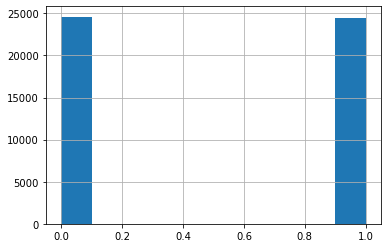

In [7]:
hd_data['cardio'].hist()

In [12]:
heartDisease_clf = setup(data = hd_data, target = 'cardio', 
                         log_experiment = True, session_id=111) 

Setup Succesfully Completed!


,Description,Value
0,session_id,111
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(49000, 12)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
hf_disease_models =compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.7340,0.8003,0.6923,0.7536,0.7216,0.4678,0.4695,4.1741
1,Light Gradient Boosting Machine,0.7337,0.7975,0.6909,0.7539,0.7210,0.4673,0.4690,0.2384
2,CatBoost Classifier,0.7330,0.7984,0.6938,0.7511,0.7212,0.4658,0.4672,22.1244
3,Ada Boost Classifier,0.7296,0.7932,0.6603,0.7646,0.7086,0.4588,0.4632,1.0922
4,Extreme Gradient Boosting,0.7251,0.7873,0.6838,0.7436,0.7124,0.4499,0.4515,0.7668
5,Logistic Regression,0.7014,0.7611,0.6627,0.7164,0.6885,0.4026,0.4038,0.4768
6,Extra Trees Classifier,0.6970,0.7547,0.6880,0.6990,0.6934,0.3940,0.3941,0.9255
7,Random Forest Classifier,0.6956,0.7509,0.6468,0.7150,0.6791,0.3910,0.3929,0.1527
8,K Neighbors Classifier,0.6709,0.7184,0.6484,0.6771,0.6623,0.3416,0.3420,0.3788
9,Ridge Classifier,0.6500,0.0000,0.6061,0.6624,0.6329,0.2997,0.3009,0.0666


In [14]:
print(hf_disease_models)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=111, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=N

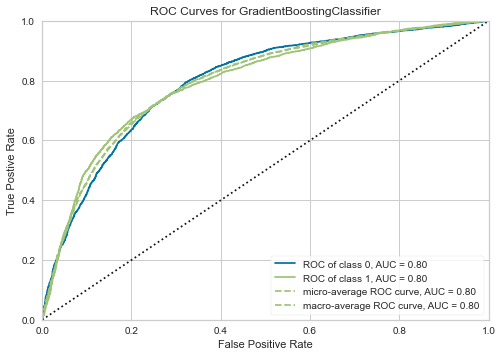

In [15]:
plot_model(hf_disease_models[0], plot = 'auc')

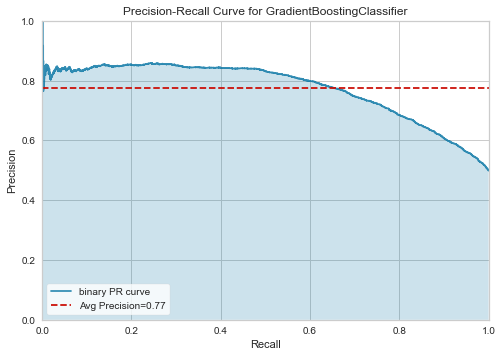

In [16]:
plot_model(hf_disease_models[0], plot = 'pr')

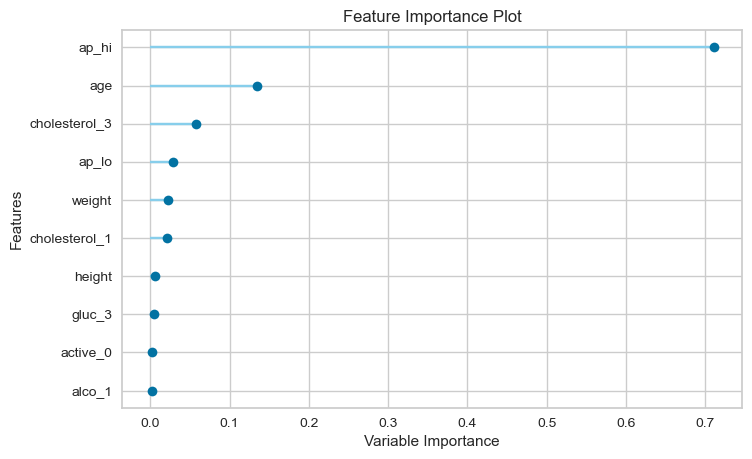

In [17]:
plot_model(hf_disease_models[0], plot='feature')

In [18]:
plot_model(hf_disease_models[2], plot='feature')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

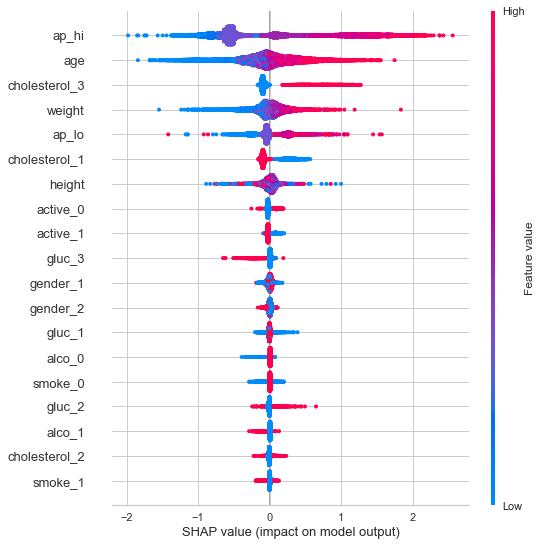

In [19]:
interpret_model(hf_disease_models[2])

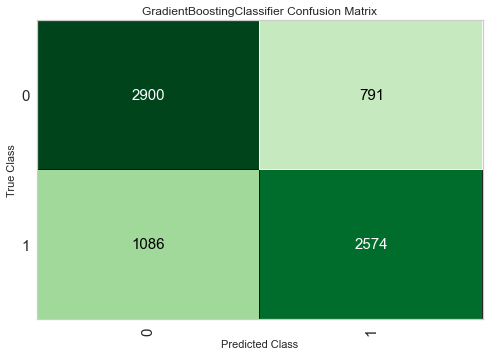

In [75]:
plot_model(hf_disease_models[0], plot = 'confusion_matrix')

In [20]:
predict_model(hf_disease_models[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7339,0.797,0.6906,0.7542,0.721,0.4676,0.4693


,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,...,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,cardio,Label,Score
0,18272.0,158.0,58.0,110.0,70.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0.1551
1,18975.0,162.0,64.0,140.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0.7711
2,23398.0,167.0,75.0,130.0,70.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,0.6702
3,21889.0,160.0,70.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.4328
4,15974.0,168.0,77.0,120.0,80.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,17575.0,164.0,45.0,115.0,70.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1130
10286,15894.0,163.0,70.0,110.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1536
10287,20160.0,156.0,67.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0.3252
10288,21094.0,164.0,90.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0.4188


In [21]:
predict_model(hf_disease_models[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7355,0.7961,0.689,0.7577,0.7217,0.4707,0.4727


,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,...,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,cardio,Label,Score
0,18272.0,158.0,58.0,110.0,70.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0.1623
1,18975.0,162.0,64.0,140.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,0.7707
2,23398.0,167.0,75.0,130.0,70.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,0.6872
3,21889.0,160.0,70.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.4529
4,15974.0,168.0,77.0,120.0,80.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.2143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,17575.0,164.0,45.0,115.0,70.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1064
10286,15894.0,163.0,70.0,110.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0.1218
10287,20160.0,156.0,67.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0.3147
10288,21094.0,164.0,90.0,120.0,80.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0.4351


In [22]:
unseen_predictions = predict_model(hf_disease_models[0], data=hd_data_unseen)
unseen_predictions.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Label,Score
0,19749,1,165,60.0,120,80,1,1,0,0,1,0,0,0.2924
1,16482,2,168,98.0,170,100,1,1,0,0,0,1,1,0.8784
2,18307,2,173,89.0,160,100,1,1,0,0,1,1,1,0.8286
3,21204,2,153,83.0,200,130,2,1,0,0,1,1,1,0.8530
4,21861,1,156,66.0,138,83,1,3,1,0,1,0,1,0.6230


In [23]:
final_GradientBoostingClassifier = finalize_model(hf_disease_models[0])

In [28]:
unseen_predictions = predict_model(final_GradientBoostingClassifier, data=hd_data_unseen)
unseen_predictions.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Label,Score
0,19749,1,165,60.0,120,80,1,1,0,0,1,0,0,0.2879
1,16482,2,168,98.0,170,100,1,1,0,0,0,1,1,0.8774
2,18307,2,173,89.0,160,100,1,1,0,0,1,1,1,0.8561
3,21204,2,153,83.0,200,130,2,1,0,0,1,1,1,0.8779
4,21861,1,156,66.0,138,83,1,3,1,0,1,0,1,0.5924


In [29]:
save_model(final_GradientBoostingClassifier,'Final GBC Model 04April2020')

Transformation Pipeline and Model Succesfully Saved


In [30]:
saved_final_GBC = load_model('Final GBC Model 04April2020')

Transformation Pipeline and Model Successfully Loaded


In [31]:
new_prediction = predict_model(saved_final_GBC, data=hd_data_unseen)

In [32]:
new_prediction.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Label,Score
0,19749,1,165,60.0,120,80,1,1,0,0,1,0,0,0.2879
1,16482,2,168,98.0,170,100,1,1,0,0,0,1,1,0.8774
2,18307,2,173,89.0,160,100,1,1,0,0,1,1,1,0.8561
3,21204,2,153,83.0,200,130,2,1,0,0,1,1,1,0.8779
4,21861,1,156,66.0,138,83,1,3,1,0,1,0,1,0.5924
